In [149]:
# Import essential library
import pandas as pd
import numpy as np

#EDA
import seaborn as sns
from matplotlib import pyplot as plt

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Preprocess
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.cluster import KMeans
from sklearn import mixture

## Import data

In [150]:
train = pd.read_csv('../input/2022-ntust-data-science-hw2/train.csv')
test = pd.read_csv('../input/2022-ntust-data-science-hw2/test_3000.csv')

### Feature說明
1. 歌曲的原聲程度。越接近 1，表示歌曲所包含的電子音樂成份越少。
2. 歌曲表現的強度。強度較高的歌曲，會讓人感到有活力、響亮、甚至吵雜。
3. 根據歌曲的節奏與穩定性，來評斷歌曲是否適合作為舞曲。越接近 0 的值，越不適合；越接近 1 的值越適合。
4. 歌曲的流行度，數值是根據播放次數作為依據，數值越高表示越流行。
5. 歌曲的速度，以每分鐘節拍數 (BPM) 為單位。
6. 歌曲在有現場觀眾的情況下進行錄製的機率。數值越高表示歌曲越有可能是現場即時錄製，或是演唱會版本。
7. 歌曲傳達的情緒。數值越高，表示歌曲聽起來越積極 (快樂、輕快)；數值越低，表示歌曲聽起來越消極 (憤怒、悲傷)。
8. 歌曲的持續時間，單位為毫秒。
9. 歌曲的響度，以分貝為單位 (dB)。
10. 歌曲中是否存在「口語」。若數值偏高，可能是脫口秀、Podcast；若數值偏低，則可能是純音樂。
11. 歌曲的調性 (大調=0，小調=1)。
12. 歌曲中的樂器演奏所佔比例，數值越高，表示歌曲的樂器演奏佔比越大。
13. 歌曲的音高，內容是依據標準的 Pitch class 來進行映射。
 

In [151]:
train.head()

,song_id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13
0,0,0.1470,0.798,0.745,46,111.016,0.1970,0.388,240000,-5.436,0.0384,1,0.651000,F
1,1,0.0658,0.804,0.521,66,143.952,0.0521,0.553,224700,-4.395,0.0569,0,0.000000,C
2,2,0.0395,0.960,0.755,67,99.023,0.3320,0.661,170440,-3.189,0.1230,1,0.000024,E
3,3,0.3590,0.769,0.592,40,171.940,0.1220,0.223,226520,-7.127,0.1900,1,0.014300,D
4,4,0.1600,0.838,0.769,83,93.996,0.0935,0.602,249609,-5.238,0.0633,0,0.000000,D


In [152]:
train.describe()

,song_id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12
count,40114.000000,40114.000000,40114.000000,40114.000000,40114.000000,40114.000000,40114.000000,40114.000000,4.011400e+04,40114.000000,40114.000000,40114.000000,40114.000000
mean,20056.500000,0.306247,0.599714,0.559131,44.464302,119.810783,0.193903,0.456827,2.456232e+05,-9.141892,0.094101,0.360149,0.180956
std,11580.058686,0.340959,0.264198,0.178867,15.477318,30.622201,0.161792,0.247000,1.103774e+05,6.156216,0.101841,0.480049,0.325070
min,0.000000,0.000000,0.000792,0.059600,0.000000,34.347000,0.009670,0.000000,1.550900e+04,-47.046000,0.022300,0.000000,0.000000
25%,10028.250000,0.020200,0.433000,0.443000,34.000000,94.859500,0.096900,0.259000,1.904800e+05,-10.851000,0.036100,0.000000,0.000000
50%,20056.500000,0.145000,0.642000,0.570000,45.000000,119.693500,0.126000,0.449000,2.273730e+05,-7.290000,0.049000,0.000000,0.000159
75%,30084.750000,0.550000,0.815000,0.688000,56.000000,140.205000,0.243000,0.648000,2.756732e+05,-5.191000,0.099500,1.000000,0.150000
max,40113.000000,0.996000,0.999000,0.986000,99.000000,220.276000,1.000000,0.992000,4.497994e+06,3.744000,0.942000,1.000000,0.996000


## Data preprocess

### Drop meaningless feature

In [153]:
train = train.drop(['song_id'], axis=1)

### Special preprocess

In [154]:
train['Feature 11'] = train['Feature 11'].astype(str)

### Count columns

In [155]:
# category column
categorical_cols = [cname for cname in train.columns 
                    if train[cname].dtype == "object"]


# numerical columns
numerical_cols = [cname for cname in train.columns
                if train[cname].dtype in ['int64', 'float64']]

print("Categorical columns:")
print(categorical_cols)

print("Numerical columns:")
print(numerical_cols)

Categorical columns:
['Feature 11', 'Feature 13']
Numerical columns:
['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Feature 12']


## EDA

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

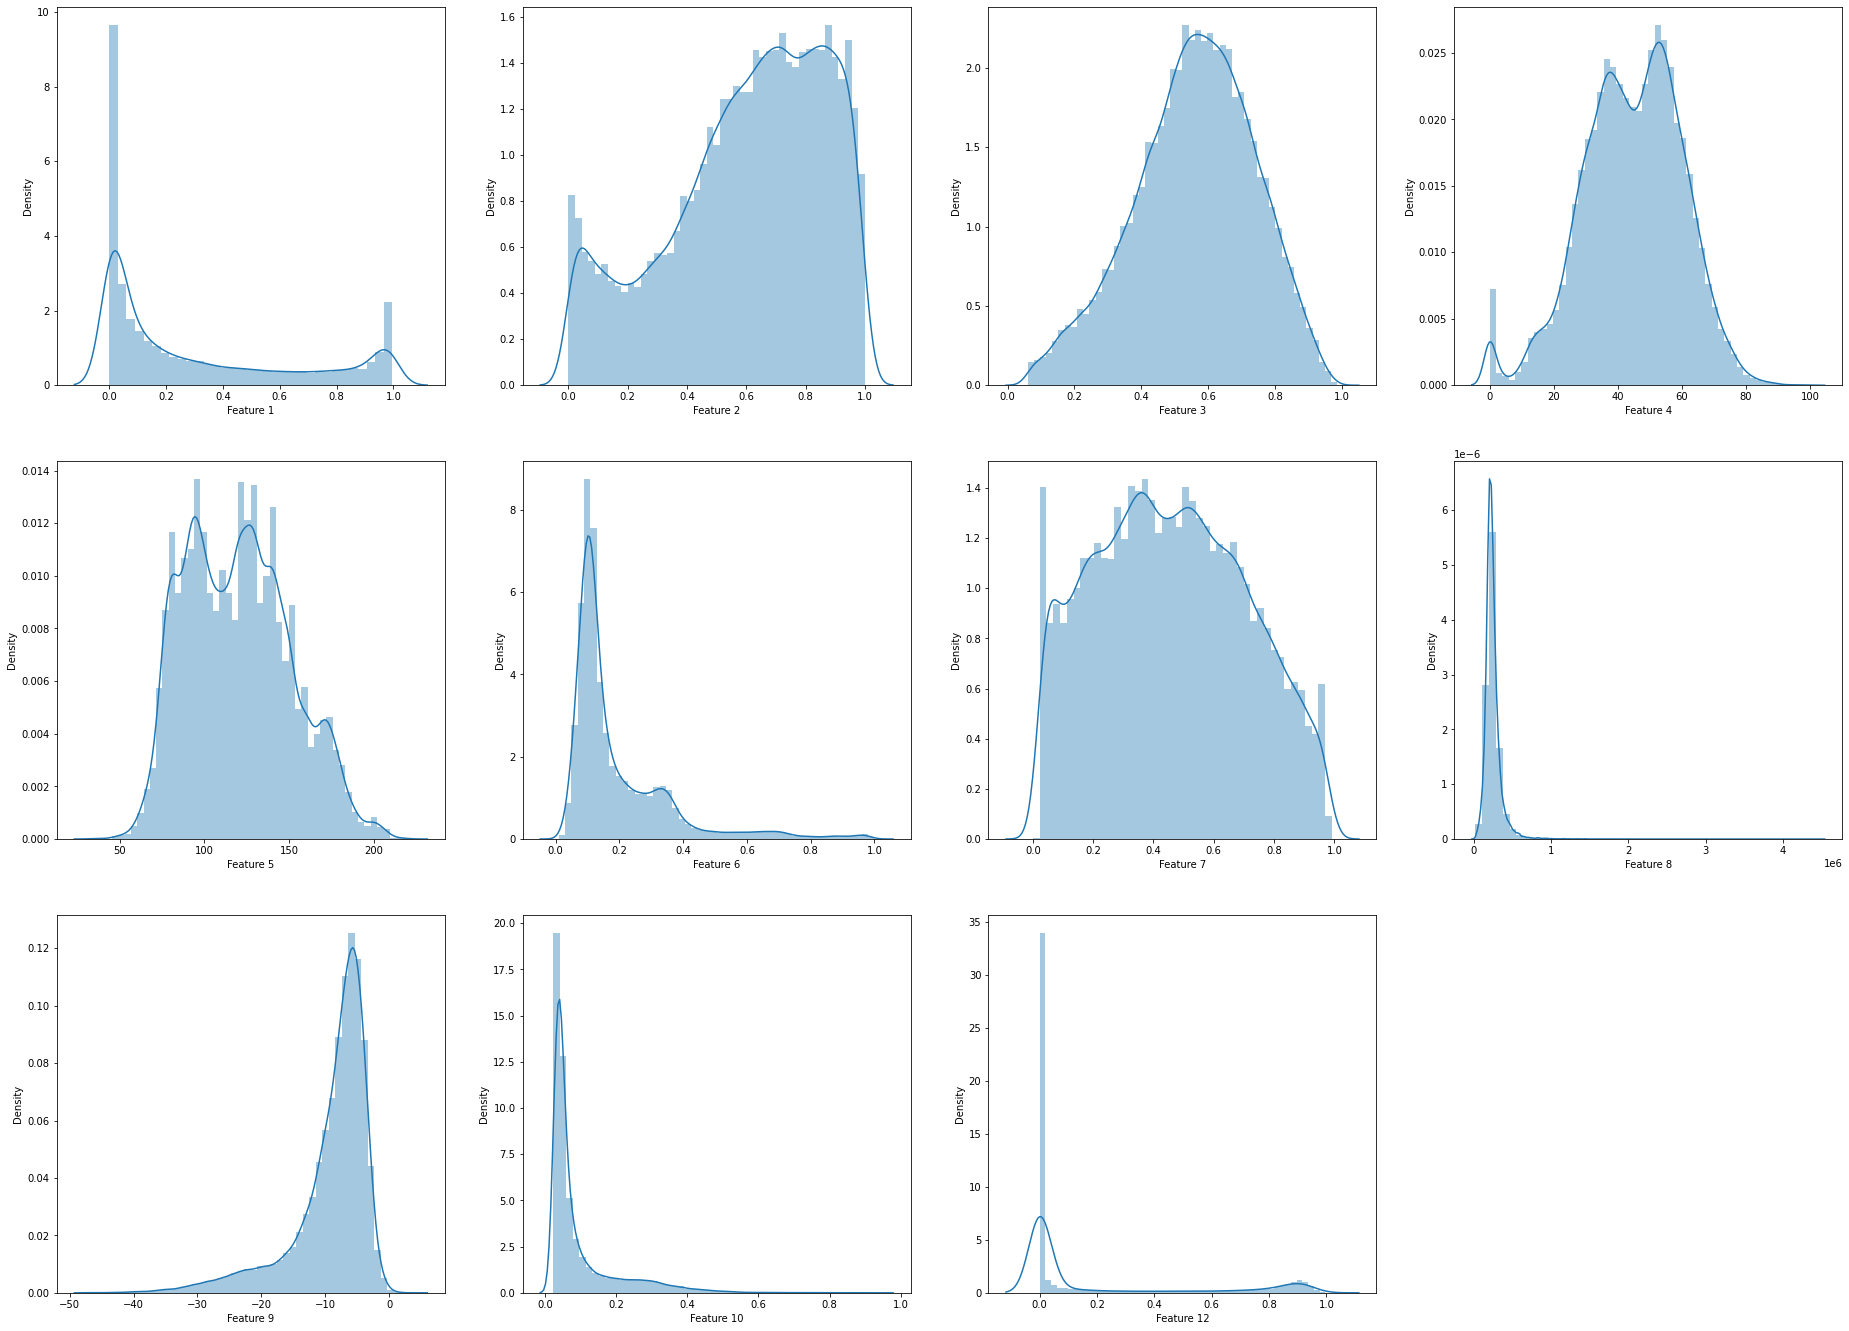

In [156]:
plt.figure(figsize=(32,32))
for i in range(len(numerical_cols)):
    plt.subplot(4,4,(i % len(numerical_cols) + 1))
    sns.distplot(train[numerical_cols[i]])
plt.show()

In [157]:
for i in range(len(numerical_cols)):
    skewness = train[numerical_cols[i]].skew()
    kurtosis = train[numerical_cols[i]].kurt()
    print(f"{numerical_cols[i]}分布\n偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

Feature 1分布
偏度(Skewness): 0.8845735362706979, 峰度(Kurtosis): -0.7138985587404241
Feature 2分布
偏度(Skewness): -0.5719120117689036, 峰度(Kurtosis): -0.5875879877154109
Feature 3分布
偏度(Skewness): -0.30447044718629424, 峰度(Kurtosis): -0.29310743594793776
Feature 4分布
偏度(Skewness): -0.3181950459382224, 峰度(Kurtosis): 0.054579602353498125
Feature 5分布
偏度(Skewness): 0.32382348922026727, 峰度(Kurtosis): -0.5621247004319914
Feature 6分布
偏度(Skewness): 2.2516880157264367, 峰度(Kurtosis): 5.7159304790510115
Feature 7分布
偏度(Skewness): 0.13127315405377182, 峰度(Kurtosis): -0.9279180168527885
Feature 8分布
偏度(Skewness): 6.56687187683127, 峰度(Kurtosis): 143.59111037596597
Feature 9分布
偏度(Skewness): -1.8780756718676073, 峰度(Kurtosis): 4.041707637620106
Feature 10分布
偏度(Skewness): 2.452576302841338, 峰度(Kurtosis): 7.233620071590299
Feature 12分布
偏度(Skewness): 1.4932527990462032, 峰度(Kurtosis): 0.4753231772278901


## Define preprocessor

In [158]:
# 數值前處理
# Use scaler to norm
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 分類前處理
# Using OH encoder
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# 前處理綁在一起
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [159]:
train = preprocessor.fit_transform(train)

### PCA

In [160]:
pca = PCA()
pca.fit(train)

PCA()

In [161]:
pca.explained_variance_ratio_

array([3.00964382e-01, 1.09490842e-01, 8.54592857e-02, 7.86277287e-02,
       7.59649470e-02, 6.58507254e-02, 5.93513504e-02, 4.85812245e-02,
       3.72577414e-02, 3.60839788e-02, 2.08646270e-02, 9.14650138e-03,
       9.08397467e-03, 8.64031701e-03, 8.52392906e-03, 7.91532174e-03,
       7.09642335e-03, 6.39642584e-03, 6.04252651e-03, 5.63046633e-03,
       5.31465940e-03, 5.00917543e-03, 2.70344686e-03, 5.65316339e-34,
       1.56729002e-34])

Text(0, 0.5, 'Cumulative explained variance')

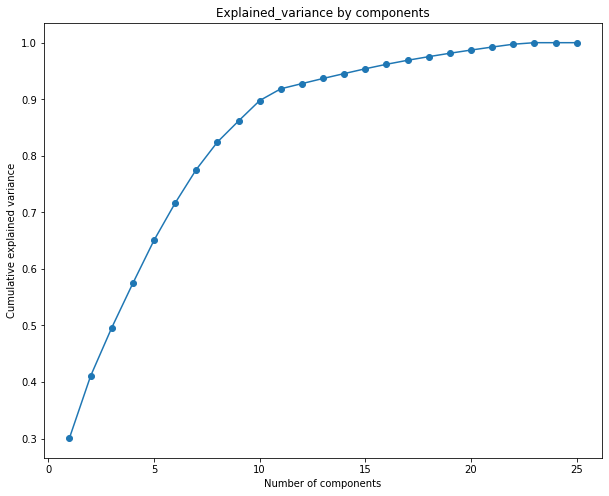

In [162]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 26), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Explained_variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [163]:
pca = PCA(n_components=8)
pca.fit(train)
train_pca = pca.transform(train)

## Clustering

In [165]:
model1= KMeans(n_clusters=3,  init='k-means++', random_state=1)
labels1 = model1.fit_predict(train_pca)
print(labels1)

"\nmodel= KMeans(n_clusters=3,  init='k-means++', random_state=1)\nlabels = model.fit_predict(train_pca)\nprint(labels)\n"

In [ ]:
model2 = mixture.GaussianMixture(n_components=3)
labels2 = model2.fit_predict(train_pca)
print(labels2)

In [166]:
songList1, songList2 = test['col_1'].tolist(), test['col_2'].tolist()

model_labels = [labels1, labels2]

result = []
for song1, song2 in zip(songList1, songList2):  
    same = 0
    diff = 0
    for labels in model_labels:
        if labels[song1] == labels[song2] :
            same += 1
        else:
            diff += 1
            
    if diff > same:
        result.append(0)
    else:
        result.append(1)  

## Result

In [167]:
result_df = pd.DataFrame({'id': [id for id in range(len(result))], 
                        'ans' : result})

result_df.to_csv('result.csv', index=False)